### Modelo SIR

El modelo SIR es uno de los modelos compartimentales más simples y muchos modelos derivan de este modelo básico. Asume que toda la población pertenece a uno de los siguientes tres compartimientos. Susceptibles de contraer la enfermedad ($S$), infectadxs ($I$) y recuperadxs ($R$). La relación entre el número de personas en cada grupo está definida por el siguiente sistema de ODEs:
\begin{align*}
    \frac{dS}{dt} &= -\beta \frac{S\,I}{N}\\
    \frac{dI}{dt} &= \beta \frac{S\,I}{N} - \gamma\, I\\
    \frac{dR}{dt} &= \gamma\, I
\end{align*}  
con $\beta$ y $\gamma$ las tasas de infección y recuperación respectivamente.





1) Considerar una población de $N = 40 ~\text{millones}$ de habitantes e inicialmente todas las personas son susceptibles. Supondremos una tasa de transmisión $\beta=0.37$ y un tiempo medio de recuperación de $10$ días, (siendo por lo tanto $\gamma=1/10$). Si inicialmente hay una única persona enferma, discutir de qué forma deberían evolucionar las poblaciones de cada grupo. 
Simular y graficar la solución que se obtiene al utilizar método de Euler y el Runge-Kutta de orden 4.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def RK_orden4(f,y0,tiempo,h):
    t0,tf = tiempo 
    n     = int((tf-t0)/h+1)
    t     = np.linspace(t0,tf,n)
    d     = len(y0) 
    y     = np.zeros((n,d))
    y[0,:]= y0 

    for i in range(n-1):
        K1=f(t[i],y[i,:])
        K2=f(t[i]+h/2,y[i,:]+h/2*K1)
        K3=f(t[i]+h/2,y[i,:]+h/2*K2)
        K4=f(t[i]+h,y[i,:]+h*K3)
        y[i+1,:] = y[i,:] + h/6*(K1+2*K2+2*K3+K4)
    return t,y

In [ ]:
#Tamaño
N=40000000

#Modelo
beta= 0.37
gamma= 1/10

#Condiciones iniciales
S0= N - 1
I0= 1
R0= 0

#Parámetros del modelo
Tf=365 #Medido en días
h=0.01

#x=[S,I,R]


f = lambda t,y: np.array([-beta * y[0] * y[1] / N ,(beta * y[0] * y[1] / N) - (gamma * y[1]) ,  gamma * y[1] ])
dato_inicial = np.array([S0,I0,R0])
t,X = RK_orden4(f,dato_inicial,[0,Tf],h) 


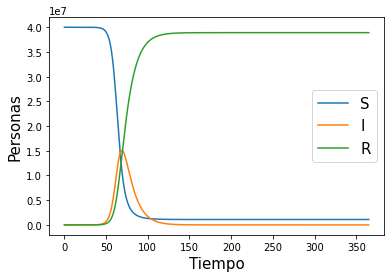

In [ ]:
plt.plot(t,X)
plt.legend(('S','I','R'),fontsize=15)
plt.xlabel('Tiempo',size=15)
plt.ylabel('Personas',size=15)
plt.show()

2) Asumiendo que no se producen fallecimientos, verificar que la población de la ciudad se mantiene constante a lo largo de la simulación.


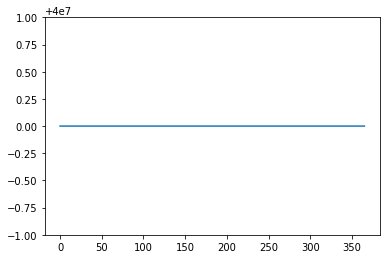

In [ ]:
Total= np.sum(X,axis=1).tolist()

plt.ylim(N-1,N+1)
plt.plot(t,Total)

3) Determinar el tiempo a partir del cual, sin acciones externas, la cantidad de infecciones comienza a descender y la cantidad de enfermos total que habría sin intervenciones.

In [ ]:
index_max = np.argmax(X[:,1])
t_des = t[index_max]

print(t_des)
print(max(X[:,1]))

68.99
15045049.014649764


4) Las medidas de cuidado y distanciamiento social permiten bajar $\beta$ el índice de infección. Suponer que luego de $d$ días de comenzada la pandemia se decide tomar medidas que perimten una reducción de $q\%$ en el índice $\beta$. Graficar la dinámica total para distintos valores de $q$ y $d$.


Otro valor importante es el *número de repoductivo efectivo* $R=\frac{\beta}{\gamma}\frac{S(t)}{N}$. 
Calcular la dinámica si se aplican medidas luego de $d=40$ días para distintos valores de $q$, y graficar el valor máximo de $I$ en función del $R$ obtenido. Discutir qué ocurre si $R<1$ o $R>1$

El R efectivo al comenzar las medidas es: 1.8468992678711824


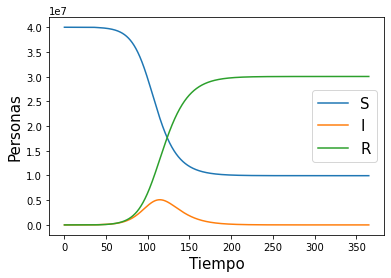

In [ ]:
d= 40
q= 0.5 
Tf=365
beta_nuevo=(1-q)*beta

#Evolución antes de las medidas
f = lambda t,y: np.array([-beta * y[0] * y[1] / N ,(beta * y[0] * y[1] / N) - (gamma * y[1]) ,  gamma * y[1] ])
dato_inicial = np.array([S0,I0,R0])
t_antes,X_antes = RK_orden4(f,dato_inicial,[0,d],h) 

#Evolución después de las medidas
f = lambda t,y: np.array([-beta_nuevo * y[0] * y[1] / N ,(beta_nuevo * y[0] * y[1] / N) - (gamma * y[1]) ,  gamma * y[1] ]) 
t_desp,X_desp = RK_orden4(f,X_antes[-1],[d,Tf],h) 

R=beta_nuevo/gamma*X_antes[-1,0]/N
print('El R efectivo al comenzar las medidas es:', R)

#Unimos las dos dinámicas
t=list(t_antes)+list(t_desp)
X=list(X_antes)+list(X_desp)


plt.plot(t,X)
plt.legend(('S','I','R'),fontsize=15)
plt.xlabel('Tiempo',size=15)
plt.ylabel('Personas',size=15)
plt.show()

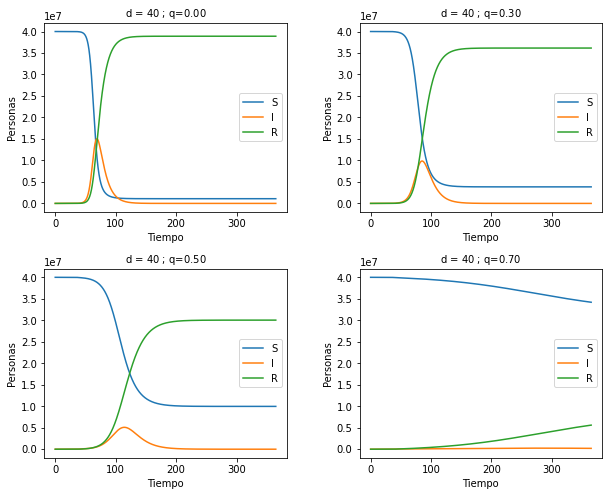

In [ ]:
#Comparar distintos parámetros
d=40

#Evolución antes de las medidas
dato_inicial=[S0,I0,R0]
f = lambda t,y: np.array([-beta * y[0] * y[1] / N ,(beta * y[0] * y[1] / N) - (gamma * y[1]) ,  gamma * y[1] ])
t_antes,X_antes = RK_orden4(f,dato_inicial,[0,d],h) #Completar 

qs = [.0, .3, .5, .7]

fig = plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.3,wspace=0.3)



for j, q in enumerate(qs):
  beta_nuevo=(1-q)*beta
  f_nuevo = lambda t,y: np.array([-beta_nuevo * y[0] * y[1] / N ,(beta_nuevo * y[0] * y[1] / N) - (gamma * y[1]) ,  gamma * y[1] ])
  t_desp,X_desp = RK_orden4(f_nuevo,X_antes[-1],[d,Tf],h) 
  t=list(t_antes)+list(t_desp)
  X=list(X_antes)+list(X_desp)
  ax = fig.add_subplot(2,2,j+1)
  plt.plot(t,X)
  plt.legend(('S','I','R'),fontsize=10)
  plt.xlabel('Tiempo',size=10)
  plt.ylabel('Personas',size=10)
  plt.title("d = $40$ ; q=%.2f"%q, fontsize=10)


     
  
  

 


In [ ]:
Rs=[]
Is_max=[]

d=40
qs2 = [.1, .2,  .3, .4, .5, .6, .7, .8, .9]

for q in qs2:
  beta_nuevo=(1-q)*beta
  R=beta_nuevo/gamma*X_antes[-1,0]/N
  Rs.append(R)
  f_nuevo = lambda t,y: np.array([-beta_nuevo * y[0] * y[1] / N ,(beta_nuevo * y[0] * y[1] / N) - (gamma * y[1]) ,  gamma * y[1] ])
  t_desp,X_desp = RK_orden4(f_nuevo,X_antes[-1],[d,Tf],h)
  t=list(t_antes)+list(t_desp)
  X=list(X_antes)+list(X_desp)

  Is_max.append(np.max(X_desp[:,1]))


    


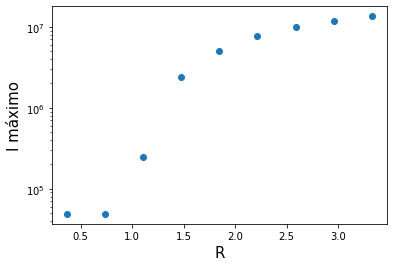

In [ ]:
#Plotear

plt.scatter(Rs,Is_max)
plt.xlabel('R',size=15)
plt.ylabel('I máximo',size=15)
plt.yscale('log')

### El modelo SEIR

Una manera de complejizar el modelo para predecir mejor es incorporar que la enfermedad tiene un tiempo de incubación durante el cual las personas infectadas no infectan. Para esto se modifica el modelo anterior incluyendo al grupo de personas *expuestas* (E) y al parámetro $\sigma$:
\begin{align*}
    \frac{dS}{dt} &= -\beta \frac{S\,I}{N}\\
    \frac{dE}{dt} &= \beta \frac{S\,I}{N} -\sigma \, E\\
    \frac{dI}{dt} &= \sigma E -\gamma\, I\\
    \frac{dR}{dt} &= \gamma\, I
\end{align*}
Modificar la rutina de simulación utilizada en el ejercicio anterior. Repetir la simulación considerando un tiempo medio de incubación de $2~\text{días}$. Graficar y comparar con las curvas del ejercicio anterior.



In [ ]:
#Tamaño
N=40000000

#Modelo
beta= 0.37
gamma= 1/10
sigma= 1/2

#Condiciones iniciales
S0= N - 1
E0= 0
I0= 1
R0= 0

#Parámetros del modelo
Tf=365 #Medido en días
h=0.01

#x=[S,E,I,R]

f = lambda t,y: np.array([-beta * y[0] * y[2] / N , (beta * y[0] * y[2] / N) -  sigma * y[1] , sigma * y[1] - (gamma * y[2]) ,  gamma * y[2] ]) 
dato_inicial = np.array([S0,E0,I0,R0])
t,X = RK_orden4(f,dato_inicial,[0,Tf],h) 

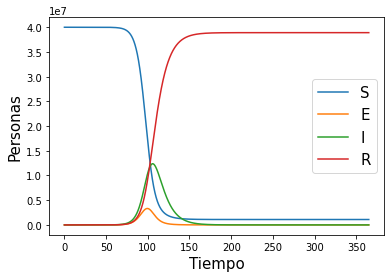

In [ ]:
#Plotear
plt.plot(t,X)
plt.legend(('S','E','I','R'),fontsize=15)
plt.xlabel('Tiempo',size=15)
plt.ylabel('Personas',size=15)
plt.show()

### El modelo SEIRS

Además, por lo que se sabe hasta ahora, ocurre con el COVID-19 así como con otras enfermedades, que las personas recuperadas pueden perder inmunidad y volver a ser susceptibles luego de un tiempo promedio $\omega^{-1}$. Por lo tanto las ecuaciones resultantes son:

\begin{align*}
    \frac{dS}{dt} &= -\beta \frac{S\,I}{N} + \omega\,R\\
    \frac{dE}{dt} &= \beta \frac{S\,I}{N} -\sigma \, E\\
    \frac{dI}{dt} &= \sigma E -\gamma\, I\\
    \frac{dR}{dt} &= \gamma\, I - \omega\,R
\end{align*}

1)Modificar la rutina de simulación utilizada en el problema anterior. Repetir la simulación considerando un tiempo medio de inmunidad es de $180~\text{días}$. 




In [ ]:
omega = 1/180

f_SEIRS2 = lambda t,y: np.array([(-beta * y[0] * y[2] / N) + omega * y[3] , (beta * y[0] * y[2] / N) -  sigma * y[1] , sigma * y[1] - (gamma * y[2]) ,  gamma * y[2] - omega * y[3] ]) 
dato_inicial = np.array([S0,E0,I0,R0])
t,X = RK_orden4(f_SEIRS2,dato_inicial,[0,Tf],h) 

2) Graficar la evolución temporal de las poblaciones de cada compartimento y el diagrama de fase de $I$ y $S$.



Text(0, 0.5, 'I')

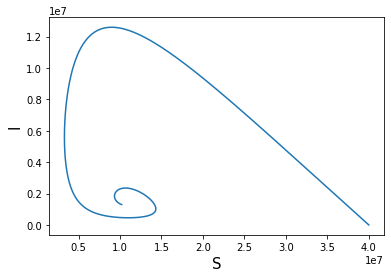

In [ ]:
#Diagrama de Fase
plt.plot(X[:,0], X[:,2]) #Completar
plt.xlabel('S',size=15)
plt.ylabel('I',size=15)

3) Verificar que la población de la ciudad se mantiene constante a lo largo de la simulación.



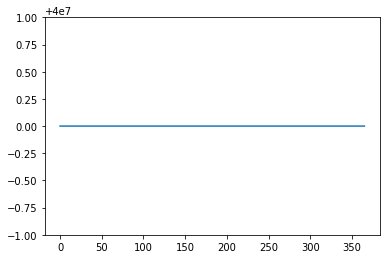

In [ ]:
Total= np.sum(X,axis=1).tolist()

plt.ylim(N-1,N+1)
plt.plot(t,Total)

4) Medir el período de las oscilaciones (intervalo inter-epidémico $T_E$).
   


In [ ]:
#Consejo: Medirlo en alguno de los compartimentos, por ejemplo, los infectadxs.

I=X[:,2]

#Buscar los valles y los picos de la sucesión
picos=[]
valles=[0] #Consideramos que el primer valor es 0
for i in range(5):

  pico=np.argmax(I[valles[-1]:])+valles[-1] #Identificamos el proximo pico como el mayor valor entre el valle identificado y el final
  print('pico en',t[pico])

  valle= np.argmin(I[pico:] ) + pico  #Completar: Identificamos el proximo valle como el menor valor entre el pico reciéén descubierto y el final
  print('valle en',t[valle])

  #Agregamos a las listas
  picos.append(pico)
  valles.append(valle)

pico en 106.05
valle en 194.73000000000002
pico en 294.99
valle en 365.0
pico en 365.0
valle en 365.0
pico en 365.0
valle en 365.0
pico en 365.0
valle en 365.0


In [ ]:
#Distancia entre los picos
distancia = np.array(t[picos[:-1]])-np.array(t[picos[1:]])

#Media de la distiancia entre los picos
print('El intervalo inter-epidémico es:', abs(np.mean(distancia)))

El intervalo inter-epidémico es: 64.7375


No handles with labels found to put in legend.


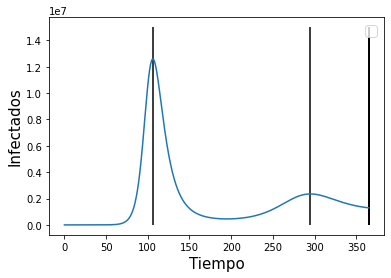

In [ ]:
#Ploteamos solo los infectados marcando los picos.
plt.plot(t,I)
plt.legend(fontsize=15)
plt.xlabel('Tiempo',size=15)
plt.ylabel('Infectados',size=15)
plt.vlines(t[picos],0,15000000)
plt.show()

5) ¿A qué valores tienden las poblaciones (en porcentaje) cuando el tiempo tiende a infinito? (equilibrio endémico)

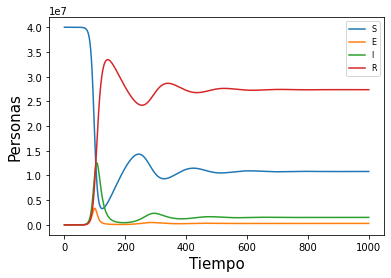

In [ ]:
t_end = 1000
t,X = RK_orden4(f_SEIRS2,dato_inicial,[0,t_end],h)
plt.plot(t,X)
plt.legend(('S','E','I','R'),fontsize=8)
plt.xlabel('Tiempo',size=15)
plt.ylabel('Personas',size=15)
plt.show()

In [ ]:
porS = (X[:,0][-1]/N)*100
print('Porcentaje suceptibles:' ,porS, '%')
porE = (X[:,1][-1]/N)*100
print('Porcentaje expuestos:' ,porE, '%')
porI = (X[:,2][-1]/N)*100
print('Porcentaje infectados:' ,porI, '%')
porR = (X[:,3][-1]/N)*100
print('Porcentaje recuperados:' ,porR, '%')

Porcentaje suceptibles: 27.03560620051592 %
Porcentaje expuestos: 0.7605741573735396 %
Porcentaje infectados: 3.801810466661456 %
Porcentaje recuperados: 68.40200917544847 %


In [ ]:
for i in range(4):
 def por(i): return (X[:,i][-1]/N)*100
 print('porcentaje', i, ':' , por(i))

porcentaje 0 : 27.03560620051592
porcentaje 1 : 0.7605741573735396
porcentaje 2 : 3.801810466661456
porcentaje 3 : 68.40200917544847
